<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#One-Hot-Encoding" data-toc-modified-id="One-Hot-Encoding-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>One-Hot Encoding</a></span></li><li><span><a href="#Data-dimensions" data-toc-modified-id="Data-dimensions-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Data dimensions</a></span></li><li><span><a href="#Plot-a-few-images-to-see-if-data-is-correct" data-toc-modified-id="Plot-a-few-images-to-see-if-data-is-correct-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Plot a few images to see if data is correct</a></span></li></ul></li><li><span><a href="#TensorFlow-Graph" data-toc-modified-id="TensorFlow-Graph-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>TensorFlow Graph</a></span><ul class="toc-item"><li><span><a href="#Placeholder-variables" data-toc-modified-id="Placeholder-variables-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Placeholder variables</a></span></li><li><span><a href="#Variables-to-be-optimized" data-toc-modified-id="Variables-to-be-optimized-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Variables to be optimized</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Cost-function-to-be-optimized" data-toc-modified-id="Cost-function-to-be-optimized-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Cost-function to be optimized</a></span></li><li><span><a href="#Optimization-method" data-toc-modified-id="Optimization-method-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Optimization method</a></span></li><li><span><a href="#Performance-measures" data-toc-modified-id="Performance-measures-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Performance measures</a></span></li></ul></li><li><span><a href="#TensorFlow-Run" data-toc-modified-id="TensorFlow-Run-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>TensorFlow Run</a></span><ul class="toc-item"><li><span><a href="#Create-TensorFlow-session" data-toc-modified-id="Create-TensorFlow-session-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Create TensorFlow session</a></span></li><li><span><a href="#Initialize-variables" data-toc-modified-id="Initialize-variables-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Initialize variables</a></span></li><li><span><a href="#Helper-functions-to-show-performance" data-toc-modified-id="Helper-functions-to-show-performance-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Helper-functions to show performance</a></span></li></ul></li><li><span><a href="#Performance-before-any-optimization" data-toc-modified-id="Performance-before-any-optimization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Performance before any optimization</a></span></li><li><span><a href="#Performance-after-1-optimization-iteration" data-toc-modified-id="Performance-after-1-optimization-iteration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Performance after 1 optimization iteration</a></span></li><li><span><a href="#Performance-after-10-optimization-iterations" data-toc-modified-id="Performance-after-10-optimization-iterations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Performance after 10 optimization iterations</a></span></li><li><span><a href="#Performance-after-1000-optimization-iterations" data-toc-modified-id="Performance-after-1000-optimization-iterations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Performance after 1000 optimization iterations</a></span></li><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Confusion Matrix</a></span></li></ul></div>

# TensorFlow Tutorial #01
# Simple Linear Model


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
#from helper import *

print(tf.__version__)

/Users/ijung/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.8.0


In [9]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [3]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


In [8]:
type(data)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

### One-Hot Encoding

In [60]:
data.test.labels[0:5, :]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [61]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])

In [62]:
data.test.cls[0:5]

array([7, 2, 1, 0, 4])

### Data dimensions

In [63]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of classes, one class for each of 10 digits.
num_classes = 10

### Plot a few images to see if data is correct

In [64]:
def plot_images(images, cls_true, cls_pred=None):
    '''
    Helper-function for plotting images

    Function used to plot 9 images in a 3x3 grid, and writing the true and predicted classes below each image.
    '''

    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()


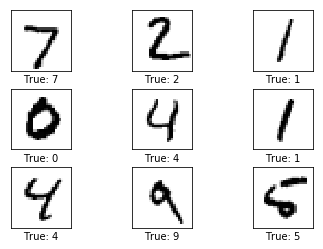

In [65]:
# Get the first images from the test-set.
images = data.test.images[0:9]

# Get the true classes for those images.
cls_true = data.test.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

## TensorFlow Graph


### Placeholder variables

In [66]:
x = tf.placeholder(tf.float32, [None, img_size_flat])
x

<tf.Tensor 'Placeholder_3:0' shape=(?, 784) dtype=float32>

In [67]:
y_true = tf.placeholder(tf.float32, [None, num_classes])
y_true

<tf.Tensor 'Placeholder_4:0' shape=(?, 10) dtype=float32>

In [68]:
y_true_cls = tf.placeholder(tf.int64, [None])
y_true_cls

<tf.Tensor 'Placeholder_5:0' shape=(?,) dtype=int64>

### Variables to be optimized

In [69]:
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
weights

<tf.Variable 'Variable_2:0' shape=(784, 10) dtype=float32_ref>

In [70]:
biases = tf.Variable(tf.zeros([num_classes]))
biases

<tf.Variable 'Variable_3:0' shape=(10,) dtype=float32_ref>

### Model

In [71]:
logits = tf.matmul(x, weights) + biases
logits

<tf.Tensor 'add_1:0' shape=(?, 10) dtype=float32>

In [72]:
y_pred = tf.nn.softmax(logits)
y_pred

<tf.Tensor 'Softmax_1:0' shape=(?, 10) dtype=float32>

In [73]:
y_pred_cls = tf.argmax(y_pred, axis=1)
y_pred_cls

<tf.Tensor 'ArgMax_1:0' shape=(?,) dtype=int64>

### Cost-function to be optimized

In [74]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                        labels=y_true)
cross_entropy

<tf.Tensor 'softmax_cross_entropy_with_logits_sg_1/Reshape_2:0' shape=(?,) dtype=float32>

In [75]:
# reduce_mean: Computes the mean of elements across dimensions of a tensor
cost = tf.reduce_mean(cross_entropy)

### Optimization method

In [76]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

### Performance measures

In [77]:
# tf.equal:  Returns the truth value of (x == y) element-wise.
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [78]:
# tf.cast: Casts a tensor to a new type.
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## TensorFlow Run

### Create TensorFlow session


In [79]:
session = tf.Session()

### Initialize variables


In [80]:
session.run(tf.global_variables_initializer())

In [81]:
batch_size = 100

### Helper-functions to show performance

In [82]:
feed_dict_test = {x: data.test.images,
                  y_true: data.test.labels,
                  y_true_cls: data.test.cls}

## Performance before any optimization


In [83]:
def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))
    
print_accuracy()

Accuracy on test-set: 9.8%


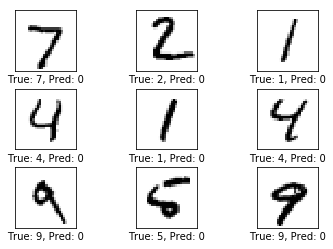

In [84]:
def plot_example_errors():
    '''
    Function for plotting examples of images from the test-set that have been mis-classified.
    '''
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.test.images[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.test.cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

plot_example_errors()

## Performance after 1 optimization iteration


In [85]:
def optimize(num_iterations):
    '''
    Helper-function to perform optimization iterations

    Function for performing a number of optimization iterations so as to gradually improve the weights and biases of the model. In each iteration, a new batch of data is selected from the training-set and then TensorFlow executes the optimizer using those training samples.
    '''
    for i in range(num_iterations):
        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        # Note that the placeholder for y_true_cls is not set
        # because it is not used during training.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

optimize(num_iterations=1)

In [86]:
print_accuracy()

Accuracy on test-set: 27.2%


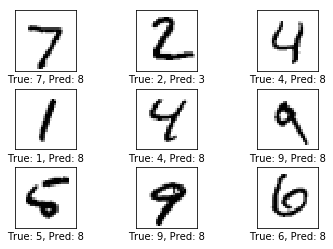

In [87]:
plot_example_errors()

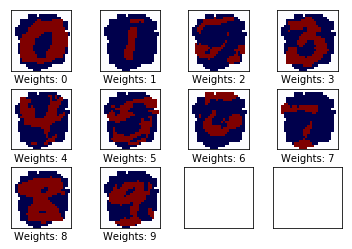

In [88]:
def plot_weights():
    '''
    Helper-function to plot the model weights¶

    Function for plotting the weights of the model. 10 images are plotted, one for each digit that the model is trained to recognize.
    '''
    # Get the values for the weights from the TensorFlow variable.
    w = session.run(weights)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(img_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()
    
plot_weights()

## Performance after 10 optimization iterations

In [89]:
# We have already performed 1 iteration.
optimize(num_iterations=9)

In [90]:
print_accuracy()

Accuracy on test-set: 79.1%


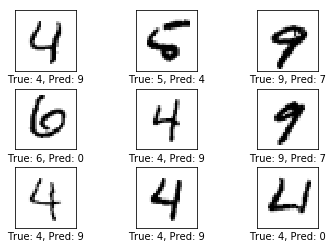

In [91]:
plot_example_errors()

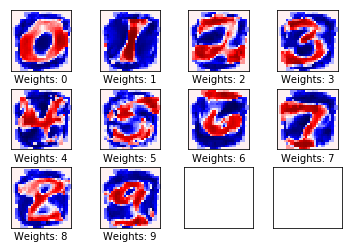

In [92]:
plot_weights()

## Performance after 1000 optimization iterations

After 1000 optimization iterations, the model only mis-classifies about one in ten images. As demonstrated below, some of the mis-classifications are justified because the images are very hard to determine with certainty even for humans, while others are quite obvious and should have been classified correctly by a good model. But this simple model cannot reach much better performance and more complex models are therefore needed.

In [93]:
# We have already performed 10 iterations.
optimize(num_iterations=990)

In [94]:
print_accuracy()

Accuracy on test-set: 91.5%


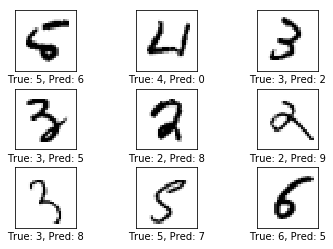

In [95]:
plot_example_errors()

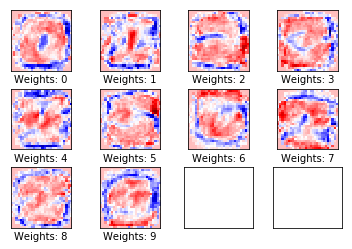

In [96]:
plot_weights()

## Confusion Matrix

[[ 965    0    0    1    0    4    3    3    2    2]
 [   0 1110    3    2    0    2    4    2   11    1]
 [  23    9  873   16   13    3   14   18   54    9]
 [   5    1   11  878    1   53    2   12   22   25]
 [   3    1    1    0  898    1    8    4   12   54]
 [  10    2    0   20    6  804    7    7   28    8]
 [  11    3    4    2   12   32  888    2    4    0]
 [   1    5   11    7    5    1    0  953    2   43]
 [   9    8    4   17   10   42    7   12  834   31]
 [  11    8    0    6   13    6    0   16    4  945]]


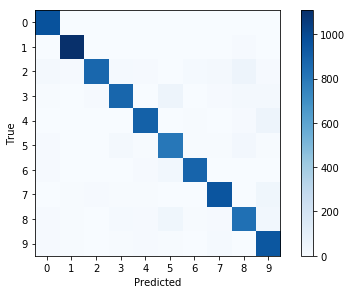

In [97]:
def print_confusion_matrix():
    '''
    Function for printing and plotting the confusion matrix using scikit-learn.
    '''
    # Get the true classifications for the test-set.
    cls_true = data.test.cls
    
    # Get the predicted classifications for the test-set.
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

print_confusion_matrix()

We are now done using TensorFlow, so we close the session to release its resources.

In [98]:
session.close()